## Preprocessing the dataset for regression
1. Standardization : Change data into the distribution with mean 0 and std1

$$x_{new} = \frac{x-mean(X)}{SD(x)}$$

2. Min-Max normalization : change date with max 1 and min 0

$$x_{new} = \frac{x-min(X)}{max(X)-min(X)}$$


2025.1.15
1. Try with three node

2. Try Eq.(11)

In [3]:
import numpy
numpy.__version__

'1.19.5'

In [4]:
import sys
print(sys.version)

3.6.13 |Anaconda, Inc.| (default, Mar 16 2021, 11:37:27) [MSC v.1916 64 bit (AMD64)]


In [99]:
import zipfile
import tensorflow as tf
import os
# import  imageio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from keras.utils import to_categorical #For keras > 2.0
# import cv2
import scipy.io
from sklearn.model_selection import train_test_split
from keras import initializers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
# import pandas as pd
# import dataframe_image as dfi
# import df2img


In [100]:
# mat = scipy.io.loadmat('EQ13_data.mat')
mat1 = scipy.io.loadmat('case1_random_forest.mat')
mat2 = scipy.io.loadmat('case2_2nodes.mat')
mat3 = scipy.io.loadmat('case3_quantum.mat')
mat4 = scipy.io.loadmat('case4_quantum.mat')

# mat_squ = scipy.io.loadmat('squeezed_va.mat')
# mat_squ = scipy.io.loadmat('squeezed_va_narrow.mat')
# mat_squ = scipy.io.loadmat('squeezed_va_1000.mat')
# mat_m_2 = scipy.io.loadmat('case2_m2_1000.mat')

# n_m_2 = mat_m_2['n_all']
# g2_m_2 = mat_m_2['g2_m']

n1 = mat1['n1_selected']
n2 = mat1['n2_selected']
g2_case1 = mat1['g2']

n1_case2 = mat2['n1_selected']
n2_case2 = mat2['n2_selected']
g2_case2 = mat2['g2']

ns3 = mat3['ns']
g2_case3 = abs(mat3['g2_a'])

ns4 = mat4['all_ns']
g2_case4 = abs(mat4['g2'])


In [101]:
ns2 = []
for i in range(1000):
    ns2.append(np.concatenate((n1_case2[0][i][0], n2_case2[0][i][0])))
    

In [102]:
np.shape(ns2)

(1000, 40)

In [103]:
# ns1_new = np.zeros((1024, 16))
ns2_new = np.zeros((1000, 16))
ns3_new = np.zeros((1000, 16))
ns4_new = np.zeros((1000, 16))
np.shape(ns3_new)

(1000, 16)

In [104]:
g2_case1_re = []
ns1_new = []
for i in range(np.shape(n1)[0]):
  for j in range(np.shape(n1)[0]):
    part = [] 
    for k in range(16):
        if k%2 == 0:
            whichone = np.reshape(n1[i][j],15)
            part.append(whichone[k])
    for k in range(16):
        if k%2 == 0:
            whichtwo = np.reshape(n2[i][j],15)
            part.append(whichtwo[k])      
    ns1_new.append(part)
    g2_case1_re.append(g2_case1[i,j])

In [105]:
# g2_case2_re = []
# ns2_new = []
# number = 1000
# r = np.arange(0, 1, 0.001)
# for i in range(number):
# # for i in range(np.shape(n1)[1]):
#     input_ = np.concatenate((np.reshape(n1_case2[0][i],len(n1_case2[0][0][0])), np.reshape(n2_case2[0][i],len(n2_case2[0][0][0]))))
#     # input = input/sum(input)
#     ns2_new.append(input_)
#     # g2_re.append({g2[0][i]:r[i]})
#     g2_case2_re.append(g2_case2[0][i])
# np.shape(ns2_new)

In [106]:
g2_case2_re = []
g2_case3_re = []
g2_case4_re = []
for j in range(1000):    
    aa = []
    bb = []
    cc = []
    for i in range(40):
        if i%2 == 0:
            aa.append(ns4[j][i])
            bb.append(ns3[0][j][0][i])
            cc.append(ns2[j][i])
    # print([len(aa),len(bb)])
    aa = aa[2:len(aa)-2]
    bb = bb[2:len(bb)-2]
    cc = cc[2:len(cc)-2]
    # print([len(aa),len(bb)])
    ns4_new[j,:] = aa
    ns3_new[j,:] = bb
    ns2_new[j,:] = cc
    g2_case2_re.append(g2_case2[0][j])
    g2_case3_re.append(g2_case3[0][j])
    g2_case4_re.append(g2_case4[j])
# len(aa)

In [107]:
X_1 = np.array(ns1_new)
Y_1 = np.reshape(g2_case1_re,(1024,1))
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_1,Y_1, test_size=0.25)

X_2 = np.array(ns2_new)
Y_2 = np.reshape(g2_case2_re,(1000,1))
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2,Y_2, test_size=0.25)

X_3 = np.array(ns3_new)
Y_3 = np.reshape(g2_case3_re,(1000,1))
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X_3,Y_3, test_size=0.25)

X_4 = np.array(ns4_new)
Y_4 = np.reshape(g2_case4_re,(1000,1))
X_train_4, X_test_4, Y_train_4, Y_test_4 = train_test_split(X_4,Y_4, test_size=0.25)

In [108]:


X_1_1 = X_1[0:256]
X_1_2 = X_1[256:512]
X_1_3 = X_1[512:768]
X_1_4 = X_1[768:1024]
Y_1_1 = Y_1[0:256]
Y_1_2 = Y_1[256:512]
Y_1_3 = Y_1[512:768]
Y_1_4 = Y_1[768:1024]

X_2_1 = X_2[0:250]
X_2_2 = X_2[250:500]
X_2_3 = X_2[500:750]
X_2_4 = X_2[750:1000]
Y_2_1 = Y_2[0:250]
Y_2_2 = Y_2[250:500]
Y_2_3 = Y_2[500:750]
Y_2_4 = Y_2[750:1000]

X_3_1 = X_3[0:250]
X_3_2 = X_3[250:500]
X_3_3 = X_3[500:750]
X_3_4 = X_3[750:1000]
Y_3_1 = Y_3[0:250]
Y_3_2 = Y_3[250:500]
Y_3_3 = Y_3[500:750]
Y_3_4 = Y_3[750:1000]

X_4_1 = X_4[0:250]
X_4_2 = X_4[250:500]
X_4_3 = X_4[500:750]
X_4_4 = X_4[750:1000]
Y_4_1 = Y_4[0:250]
Y_4_2 = Y_4[250:500]
Y_4_3 = Y_4[500:750]
Y_4_4 = Y_4[750:1000]

In [109]:
regressor_1 = ExtraTreesRegressor()
regressor_1.fit(X_train_1, Y_train_1)
Y_predict_RFR1_1_1 = regressor_1.predict(X_1_1)
Y_predict_RFR1_1_2 = regressor_1.predict(X_1_2) 
Y_predict_RFR1_1_3 = regressor_1.predict(X_1_3)
Y_predict_RFR1_1_4 = regressor_1.predict(X_1_4)

Y_predict_RFR1_2_1 = regressor_1.predict(X_2_1)
Y_predict_RFR1_2_2 = regressor_1.predict(X_2_2) 
Y_predict_RFR1_2_3 = regressor_1.predict(X_2_3)
Y_predict_RFR1_2_4 = regressor_1.predict(X_2_4)


Y_predict_RFR1_3_1 = regressor_1.predict(X_3_1)
Y_predict_RFR1_3_2 = regressor_1.predict(X_3_2) 
Y_predict_RFR1_3_3 = regressor_1.predict(X_3_3)
Y_predict_RFR1_3_4 = regressor_1.predict(X_3_4)

Y_predict_RFR1_4_1 = regressor_1.predict(X_4_1)
Y_predict_RFR1_4_2 = regressor_1.predict(X_4_2) 
Y_predict_RFR1_4_3 = regressor_1.predict(X_4_3)
Y_predict_RFR1_4_4 = regressor_1.predict(X_4_4)


regressor_2 = ExtraTreesRegressor()
regressor_2.fit(X_train_2, Y_train_2)
Y_predict_RFR2_1_1 = regressor_2.predict(X_1_1)
Y_predict_RFR2_1_2 = regressor_2.predict(X_1_2) 
Y_predict_RFR2_1_3 = regressor_2.predict(X_1_3)
Y_predict_RFR2_1_4 = regressor_2.predict(X_1_4)

Y_predict_RFR2_3_1 = regressor_2.predict(X_3_1)
Y_predict_RFR2_3_2 = regressor_2.predict(X_3_2) 
Y_predict_RFR2_3_3 = regressor_2.predict(X_3_3)
Y_predict_RFR2_3_4 = regressor_2.predict(X_3_4)

Y_predict_RFR2_4_1 = regressor_2.predict(X_4_1)
Y_predict_RFR2_4_2 = regressor_2.predict(X_4_2) 
Y_predict_RFR2_4_3 = regressor_2.predict(X_4_3)
Y_predict_RFR2_4_4 = regressor_2.predict(X_4_4)

regressor_3 = ExtraTreesRegressor()
regressor_3.fit(X_train_3, Y_train_3)
Y_predict_RFR3_1_1 = regressor_3.predict(X_1_1)
Y_predict_RFR3_1_2 = regressor_3.predict(X_1_2) 
Y_predict_RFR3_1_3 = regressor_3.predict(X_1_3)
Y_predict_RFR3_1_4 = regressor_3.predict(X_1_4)

Y_predict_RFR3_2_1 = regressor_3.predict(X_2_1)
Y_predict_RFR3_2_2 = regressor_3.predict(X_2_2) 
Y_predict_RFR3_2_3 = regressor_3.predict(X_2_3)
Y_predict_RFR3_2_4 = regressor_3.predict(X_2_4)

Y_predict_RFR3_4_1 = regressor_3.predict(X_4_1)
Y_predict_RFR3_4_2 = regressor_3.predict(X_4_2) 
Y_predict_RFR3_4_3 = regressor_3.predict(X_4_3)
Y_predict_RFR3_4_4 = regressor_3.predict(X_4_4)

regressor_4 = ExtraTreesRegressor()
regressor_4.fit(X_train_4, Y_train_4)
Y_predict_RFR4_1_1 = regressor_4.predict(X_1_1)
Y_predict_RFR4_1_2 = regressor_4.predict(X_1_2) 
Y_predict_RFR4_1_3 = regressor_4.predict(X_1_3)
Y_predict_RFR4_1_4 = regressor_4.predict(X_1_4)

Y_predict_RFR4_2_1 = regressor_4.predict(X_2_1)
Y_predict_RFR4_2_2 = regressor_4.predict(X_2_2) 
Y_predict_RFR4_2_3 = regressor_4.predict(X_2_3)
Y_predict_RFR4_2_4 = regressor_4.predict(X_2_4)

Y_predict_RFR4_3_1 = regressor_4.predict(X_3_1)
Y_predict_RFR4_3_2 = regressor_4.predict(X_3_2) 
Y_predict_RFR4_3_3 = regressor_4.predict(X_3_3)
Y_predict_RFR4_3_4 = regressor_4.predict(X_3_4)

C:\Users\kodo0\.conda\envs\python3_6\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\kodo0\.conda\envs\python3_6\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\kodo0\.conda\envs\python3_6\lib\site-packages\ipykernel_launcher.py:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\kodo0\.conda\envs\python3_6\lib\site-packages\ipykernel_launcher.py:60: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [110]:
def NMSE(Y_predict_RFR,Y_test_g2):
    Nomin = sum(np.square(np.reshape(Y_test_g2,[len(Y_predict_RFR),]) - Y_predict_RFR))
    denom = sum(np.square(np.reshape(Y_test_g2,[len(Y_predict_RFR),]) + Y_predict_RFR))

#     Nomin_c = sum(np.square(np.reshape(Y_test_g2_c,[len(Y_predict_RFR_classic),]) - Y_predict_RFR_classic))
#     denom_c = sum(np.square(np.reshape(Y_test_g2_c,[len(Y_predict_RFR_classic),]) + Y_predict_RFR_classic))
    return Nomin/denom
# print([Nomin/denom, Nomin_c/denom_c])

In [111]:
NMSE(Y_predict_RFR1_2_1,Y_2_1)

0.5221095423610599

In [112]:
mmse12=[NMSE(Y_predict_RFR1_2_1, Y_2_1), NMSE(Y_predict_RFR1_2_2, Y_2_2), NMSE(Y_predict_RFR1_2_3, Y_2_3), NMSE(Y_predict_RFR1_2_4, Y_2_4)]
mmse13=[NMSE(Y_predict_RFR1_3_1, Y_3_1), NMSE(Y_predict_RFR1_3_2, Y_3_2), NMSE(Y_predict_RFR1_3_3, Y_3_3), NMSE(Y_predict_RFR1_3_4, Y_3_4)]
mmse14=[NMSE(Y_predict_RFR1_4_1, Y_4_1), NMSE(Y_predict_RFR1_4_2, Y_4_2), NMSE(Y_predict_RFR1_4_3, Y_4_3), NMSE(Y_predict_RFR1_4_4, Y_4_4)]

mmse21=[NMSE(Y_predict_RFR2_1_1, Y_1_1), NMSE(Y_predict_RFR2_1_2, Y_1_2), NMSE(Y_predict_RFR2_1_3, Y_1_3), NMSE(Y_predict_RFR2_1_4, Y_1_4)]
mmse23=[NMSE(Y_predict_RFR2_3_1, Y_3_1), NMSE(Y_predict_RFR2_3_2, Y_3_2), NMSE(Y_predict_RFR2_3_3, Y_3_3), NMSE(Y_predict_RFR2_3_4, Y_3_4)]
mmse24=[NMSE(Y_predict_RFR2_4_1, Y_4_1), NMSE(Y_predict_RFR2_4_2, Y_4_2), NMSE(Y_predict_RFR2_4_3, Y_4_3), NMSE(Y_predict_RFR2_4_4, Y_4_4)]

mmse31=[NMSE(Y_predict_RFR3_1_1, Y_1_1), NMSE(Y_predict_RFR3_1_2, Y_1_2), NMSE(Y_predict_RFR3_1_3, Y_1_3), NMSE(Y_predict_RFR3_1_4, Y_1_4)]
mmse32=[NMSE(Y_predict_RFR3_2_1, Y_2_1), NMSE(Y_predict_RFR3_2_2, Y_2_2), NMSE(Y_predict_RFR3_2_3, Y_2_3), NMSE(Y_predict_RFR3_2_4, Y_2_4)]
mmse34=[NMSE(Y_predict_RFR3_4_1, Y_4_1), NMSE(Y_predict_RFR3_4_2, Y_4_2), NMSE(Y_predict_RFR3_4_3, Y_4_3), NMSE(Y_predict_RFR3_4_4, Y_4_4)]

mmse41=[NMSE(Y_predict_RFR4_1_1, Y_1_1), NMSE(Y_predict_RFR4_1_2, Y_1_2), NMSE(Y_predict_RFR4_1_3, Y_1_3), NMSE(Y_predict_RFR4_1_4, Y_1_4)]
mmse42=[NMSE(Y_predict_RFR4_2_1, Y_2_1), NMSE(Y_predict_RFR4_2_2, Y_2_2), NMSE(Y_predict_RFR4_2_3, Y_2_3), NMSE(Y_predict_RFR4_2_4, Y_2_4)]
mmse43=[NMSE(Y_predict_RFR4_3_1, Y_3_1), NMSE(Y_predict_RFR4_3_2, Y_3_2), NMSE(Y_predict_RFR4_3_3, Y_3_3), NMSE(Y_predict_RFR4_3_4, Y_3_4)]

C:\Users\kodo0\.conda\envs\python3_6\lib\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
C:\Users\kodo0\.conda\envs\python3_6\lib\site-packages\ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


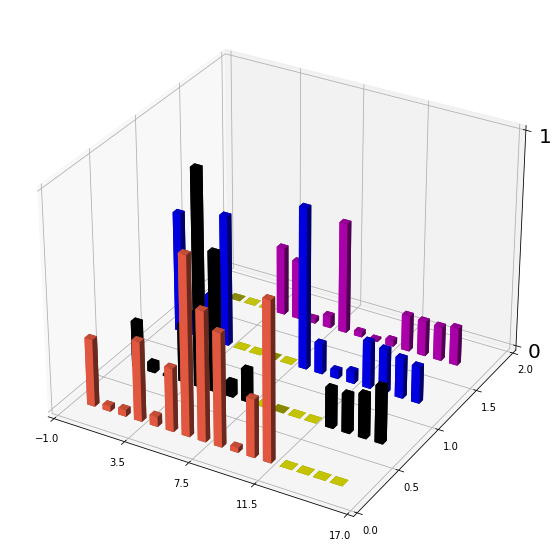

In [113]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample data
subjects = ['Mathematics', 'Physics', 'Chemistry']
student_name = ['A', 'B', 'C']
marks = [[90, 95, 93],[75, 78, 70],[30, 25, 35]]

# Custom colors for each student based on marks
colors = {'A': 'green', 'B': 'yellow', 'C': 'red'}

# Creating a 3D plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

dx = 0.5
dy = 0.05
for i in range(4):
    ax.bar3d(i+12, 0.15, 0, dx*1.5, dy*1.5, 0,color='yellow')
    ax.bar3d(i+8, 0.15, 0, dx, dy, mmse12[i],color='tomato')
    ax.bar3d(i+4, 0.15, 0, dx, dy, mmse13[i],color='tomato')
    ax.bar3d(i, 0.15, 0, dx, dy, mmse14[i],color='tomato')

    ax.bar3d(i+12.2, 0.65, 0, dx, dy, mmse21[i],color='k')
    ax.bar3d(i+7.9, 0.65, 0, dx*1.5, dy*1.5, 0,color='yellow')
    ax.bar3d(i+4, 0.65, 0, dx, dy, mmse23[i],color='k')
    ax.bar3d(i, 0.65, 0, dx, dy, mmse24[i],color='k')

    ax.bar3d(i+12, 1.15, 0, dx, dy, mmse31[i],color='b')
    ax.bar3d(i+8, 1.15, 0, dx, dy, mmse32[i],color='b')
    ax.bar3d(i+4-0.2, 1.15, 0, dx*1.5, dy*1.5, 0,color='yellow')
    ax.bar3d(i, 1.15, 0, dx, dy, mmse34[i],color='b')

    ax.bar3d(i+12, 1.65, 0, dx, dy, mmse41[i],color='m')
    ax.bar3d(i+8, 1.65, 0, dx, dy, mmse42[i],color='m')
    ax.bar3d(i+4, 1.65, 0, dx, dy, mmse43[i],color='m')
    ax.bar3d(i-0.2, 1.65, 0, dx*1.5, dy*1.5, 0,color='#FFFF14')


# ax.set_xticks([17,11.5,7.5,3.5,-1],"")
ax.set_xticks([17,11.5,7.5,3.5,-1],"")
ax.set_yticks([0,0.5,1.0,1.5,2],"")
ax.set_zticks([0,1])
ax.set_zlim([0,1])
ax.tick_params(axis ='z',labelsize=20)
# ax.set_zlabel("sssssss")
# Plotting 3D bars with custom colors
# for i in range(len(subjects)):
#    for j in range(len(student_name)):
#       ax.bar3d(i, j, 0, 0.8, 0.8, marks[j][i], color=colors[student_name[j]])


# Displaying the plot
plt.savefig("histo.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [114]:
[mse(Y_predict_RFR1_1_1, Y_1_1), mse(Y_predict_RFR1_1_2, Y_1_2), mse(Y_predict_RFR1_1_3, Y_1_3)]

[4.8177077645478774e-05, 0.0001512156021266316, 0.0004344863404446152]

In [115]:
regressor_1 = ExtraTreesRegressor()
regressor_1.fit(X_train_1, Y_train_1)
Y_predict_RFR1_1_1 = regressor_1.predict(X_1_1)
Y_predict_RFR1_1_2 = regressor_1.predict(X_1_2) 
Y_predict_RFR1_1_3 = regressor_1.predict(X_1_3)
Y_predict_RFR1_1_4 = regressor_1.predict(X_1_4)

Y_predict_RFR1_2_1 = regressor_1.predict(X_2_1)
Y_predict_RFR1_2_2 = regressor_1.predict(X_2_2) 
Y_predict_RFR1_2_3 = regressor_1.predict(X_2_3)
Y_predict_RFR1_2_4 = regressor_1.predict(X_2_4)


Y_predict_RFR1_3_1 = regressor_1.predict(X_3_1)
Y_predict_RFR1_3_2 = regressor_1.predict(X_3_2) 
Y_predict_RFR1_3_3 = regressor_1.predict(X_3_3)
Y_predict_RFR1_3_4 = regressor_1.predict(X_3_4)

Y_predict_RFR1_4_1 = regressor_1.predict(X_4_1)
Y_predict_RFR1_4_2 = regressor_1.predict(X_4_2) 
Y_predict_RFR1_4_3 = regressor_1.predict(X_4_3)
Y_predict_RFR1_4_4 = regressor_1.predict(X_4_4)


regressor_2 = ExtraTreesRegressor()
regressor_2.fit(X_train_2, Y_train_2)
Y_predict_RFR2_1_1 = regressor_2.predict(X_1_1)
Y_predict_RFR2_1_2 = regressor_2.predict(X_1_2) 
Y_predict_RFR2_1_3 = regressor_2.predict(X_1_3)
Y_predict_RFR2_1_4 = regressor_2.predict(X_1_4)

Y_predict_RFR2_3_1 = regressor_2.predict(X_3_1)
Y_predict_RFR2_3_2 = regressor_2.predict(X_3_2) 
Y_predict_RFR2_3_3 = regressor_2.predict(X_3_3)
Y_predict_RFR2_3_4 = regressor_2.predict(X_3_4)

Y_predict_RFR2_4_1 = regressor_2.predict(X_4_1)
Y_predict_RFR2_4_2 = regressor_2.predict(X_4_2) 
Y_predict_RFR2_4_3 = regressor_2.predict(X_4_3)
Y_predict_RFR2_4_4 = regressor_2.predict(X_4_4)

regressor_3 = ExtraTreesRegressor()
regressor_3.fit(X_train_3, Y_train_3)
Y_predict_RFR3_1_1 = regressor_3.predict(X_1_1)
Y_predict_RFR3_1_2 = regressor_3.predict(X_1_2) 
Y_predict_RFR3_1_3 = regressor_3.predict(X_1_3)
Y_predict_RFR3_1_4 = regressor_3.predict(X_1_4)

Y_predict_RFR3_2_1 = regressor_3.predict(X_2_1)
Y_predict_RFR3_2_2 = regressor_3.predict(X_2_2) 
Y_predict_RFR3_2_3 = regressor_3.predict(X_2_3)
Y_predict_RFR3_2_4 = regressor_3.predict(X_2_4)

Y_predict_RFR3_4_1 = regressor_3.predict(X_4_1)
Y_predict_RFR3_4_2 = regressor_3.predict(X_4_2) 
Y_predict_RFR3_4_3 = regressor_3.predict(X_4_3)
Y_predict_RFR3_4_4 = regressor_3.predict(X_4_4)

regressor_4 = ExtraTreesRegressor()
regressor_4.fit(X_train_4, Y_train_4)
Y_predict_RFR4_1_1 = regressor_4.predict(X_1_1)
Y_predict_RFR4_1_2 = regressor_4.predict(X_1_2) 
Y_predict_RFR4_1_3 = regressor_4.predict(X_1_3)
Y_predict_RFR4_1_4 = regressor_4.predict(X_1_4)

Y_predict_RFR4_2_1 = regressor_4.predict(X_2_1)
Y_predict_RFR4_2_2 = regressor_4.predict(X_2_2) 
Y_predict_RFR4_2_3 = regressor_4.predict(X_2_3)
Y_predict_RFR4_2_4 = regressor_4.predict(X_2_4)

Y_predict_RFR4_3_1 = regressor_4.predict(X_3_1)
Y_predict_RFR4_3_2 = regressor_4.predict(X_3_2) 
Y_predict_RFR4_3_3 = regressor_4.predict(X_3_3)
Y_predict_RFR4_3_4 = regressor_4.predict(X_3_4)

C:\Users\kodo0\.conda\envs\python3_6\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\kodo0\.conda\envs\python3_6\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\kodo0\.conda\envs\python3_6\lib\site-packages\ipykernel_launcher.py:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\kodo0\.conda\envs\python3_6\lib\site-packages\ipykernel_launcher.py:60: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [116]:
# regressor_2 = RandomForestRegressor()
# regressor_2.fit(X_train_2, Y_train_2)


# Y_predict_RFR_m_2 = regressor_2.predict(n_m_2_new) 
# # Y_predict_RFR_m_1 = regressor_2.predict(X_test_2) 


# regressor_m_2= RandomForestRegressor()
# regressor_m_2.fit(n_m_2_new, g2_m_2)

# Y_predict_RFR_m_2_test_m_1 = regressor_m_2.predict(X_test_2) 
# # Y_predict_RFR_m_1 = regressor_2.predict(X_test_2) 

# # Y_predict_RFR_squ_1 = regressor_squ.predict(X_test_1)
# # Y_predict_RFR_squ_2 = regressor_squ.predict(X_test_2) 
# # Y_predict_RFR_squ_3 = regressor_squ.predict(X_test_3)
# # Y_predict_RFR_squ_4 = regressor_squ.predict(X_test_4)


In [117]:
# plt.scatter(Y_test_2, Y_predict_RFR_m_2_test_m_1)
# mean_squared_error(Y_test_2,Y_predict_RFR_m_2_test_m_1)

In [118]:
# plt.subplot(2,2,1)
# plt.scatter(Y_test_1, Y_predict_RFR_squ_1)
# plt.subplot(2,2,2)
# plt.scatter(Y_test_2, Y_predict_RFR_squ_2)
# plt.subplot(2,2,3)
# plt.scatter(Y_test_3, Y_predict_RFR_squ_3)
# plt.subplot(2,2,4)
# plt.scatter(Y_test_4, Y_predict_RFR_squ_4)
# # plt.scatter(Y_test_2, Y_predict_RFR_squ_1)
# # plt.scatter(Y_test_3, Y_predict_RFR_squ_1)
# # plt.scatter(Y_test_4, Y_predict_RFR_squ_1)
# # plt.scatter(g2_squ, Y_predict_2_squ)
# # plt.scatter(g2_squ, Y_predict_3_squ)
# # plt.scatter(g2_squ, Y_predict_4_squ)

In [119]:
regressor_1 = ExtraTreesRegressor()
regressor_1.fit(X_train_1, Y_train_1)

regressor_2 = ExtraTreesRegressor()
regressor_2.fit(X_train_2, Y_train_2)

regressor_3 = ExtraTreesRegressor()
regressor_3.fit(X_train_3, Y_train_3)

regressor_4 = ExtraTreesRegressor()
regressor_4.fit(X_train_4, Y_train_4)

Y_predict_RFR_1_1 = regressor_1.predict(X_test_1)
Y_predict_RFR_1_2 = regressor_1.predict(X_test_2) 
Y_predict_RFR_1_3 = regressor_1.predict(X_test_3)
Y_predict_RFR_1_4 = regressor_1.predict(X_test_4)
# Y_predict_1_squ = regressor_1.predict(n_squ_new)

Y_predict_RFR_2_1 = regressor_2.predict(X_test_1)
Y_predict_RFR_2_2 = regressor_2.predict(X_test_2)
Y_predict_RFR_2_3 = regressor_2.predict(X_test_3)
Y_predict_RFR_2_4 = regressor_2.predict(X_test_4)
# Y_predict_2_squ = regressor_2.predict(n_squ_new)

Y_predict_RFR_3_1 = regressor_3.predict(X_test_1)
Y_predict_RFR_3_2 = regressor_3.predict(X_test_2)
Y_predict_RFR_3_3 = regressor_3.predict(X_test_3)
Y_predict_RFR_3_4 = regressor_3.predict(X_test_4)
# Y_predict_3_squ = regressor_3.predict(n_squ_new)

Y_predict_RFR_4_1 = regressor_4.predict(X_test_1)
Y_predict_RFR_4_2 = regressor_4.predict(X_test_2)
Y_predict_RFR_4_3 = regressor_4.predict(X_test_3)
Y_predict_RFR_4_4 = regressor_4.predict(X_test_4)
# Y_predict_4_squ = regressor_4.predict(n_squ_new)

C:\Users\kodo0\.conda\envs\python3_6\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\kodo0\.conda\envs\python3_6\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
C:\Users\kodo0\.conda\envs\python3_6\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\kodo0\.conda\envs\python3_6\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.i

In [120]:
# plt.scatter(g2_squ, Y_predict_1_squ)
# plt.scatter(g2_squ, Y_predict_2_squ)
# plt.scatter(g2_squ, Y_predict_3_squ)
# plt.scatter(g2_squ, Y_predict_4_squ)

[0.0007093220928116121, 0.19893510749695792, 0.1903885478311622, 0.1686792934308665]


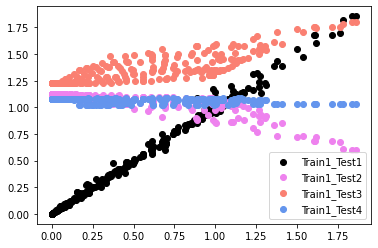

In [121]:
plt.scatter(Y_test_1, Y_predict_RFR_1_1, label='Train1_Test1', color='k')
plt.scatter(Y_test_1, Y_predict_RFR_2_1, label='Train1_Test2', color='violet')
plt.scatter(Y_test_1, Y_predict_RFR_3_1, label='Train1_Test3', color='salmon')
plt.scatter(Y_test_1, Y_predict_RFR_4_1, label='Train1_Test4', color='cornflowerblue')
error1 = [NMSE(Y_predict_RFR_1_1,Y_test_1),NMSE(Y_predict_RFR_2_1,Y_test_1),NMSE(Y_predict_RFR_3_1,Y_test_1),NMSE(Y_predict_RFR_4_1,Y_test_1)]
print(error1)
plt.legend()
plt.savefig('train1.png')

[0.3463137379650812, 1.3975029484265581e-08, 0.28504164417990746, 0.07077444577217779]


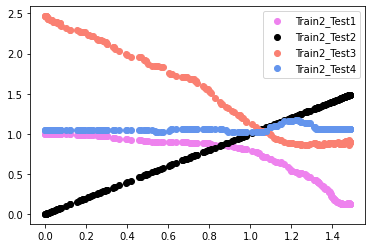

In [122]:
plt.scatter(Y_test_2, Y_predict_RFR_1_2, label='Train2_Test1', color='violet')
plt.scatter(Y_test_2, Y_predict_RFR_2_2, label='Train2_Test2', color='k')
plt.scatter(Y_test_2, Y_predict_RFR_3_2, label='Train2_Test3', color='salmon')
plt.scatter(Y_test_2, Y_predict_RFR_4_2, label='Train2_Test4', color='cornflowerblue')
error2 = [NMSE(Y_predict_RFR_1_2,Y_test_2),NMSE(Y_predict_RFR_2_2,Y_test_2),NMSE(Y_predict_RFR_3_2,Y_test_2),NMSE(Y_predict_RFR_4_2,Y_test_2)]
print(error2)
plt.legend()
plt.savefig('train2.png')

[0.19072652551234445, 0.5058024441653468, 0.0008466428874088384, 0.21102673118622797]


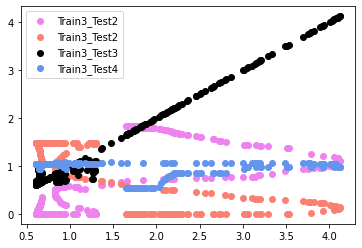

In [97]:
plt.scatter(Y_test_3, Y_predict_RFR_1_3, label='Train3_Test2', color='violet')
plt.scatter(Y_test_3, Y_predict_RFR_2_3, label='Train3_Test2', color='salmon')
plt.scatter(Y_test_3, Y_predict_RFR_3_3, label='Train3_Test3', color='k')
plt.scatter(Y_test_3, Y_predict_RFR_4_3, label='Train3_Test4', color='cornflowerblue')
error3 = [NMSE(Y_predict_RFR_1_3,Y_test_3),NMSE(Y_predict_RFR_2_3,Y_test_3),NMSE(Y_predict_RFR_3_3,Y_test_3),NMSE(Y_predict_RFR_4_3,Y_test_3)]
print(error3)
plt.legend()
plt.savefig('train3.png')

[0.12172178563926224, 0.08536988108087025, 0.2503286698634571, 7.552003334548046e-07]


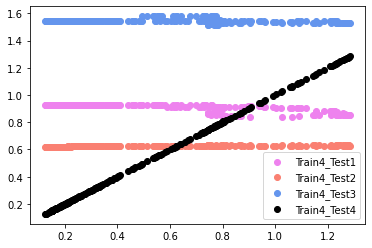

In [98]:
plt.scatter(Y_test_4, Y_predict_RFR_1_4, label='Train4_Test1', color='violet')
plt.scatter(Y_test_4, Y_predict_RFR_2_4, label='Train4_Test2', color='salmon')
plt.scatter(Y_test_4, Y_predict_RFR_3_4, label='Train4_Test3', color='cornflowerblue')
plt.scatter(Y_test_4, Y_predict_RFR_4_4, label='Train4_Test4', color='k')
error4 = [NMSE(Y_predict_RFR_1_4,Y_test_4),NMSE(Y_predict_RFR_2_4,Y_test_4),NMSE(Y_predict_RFR_3_4,Y_test_4),NMSE(Y_predict_RFR_4_4,Y_test_4)]
print(error4)
plt.legend()
plt.savefig('train4.png')

In [83]:
def draw_color_cell(x,color):
    color = f'background-color:{color}'
    return color

In [87]:
frame = pd.DataFrame(data,index = ['case1', 'case2', 'case3', 'case4'])
# frame.style.applymap(draw_color_cell,color='#ff9090',subset=pd.IndexSlice['case1',['case1'],'case2',['case2']])
# frame.style.applymap(draw_color_cell,color='#ff9090',subset=pd.IndexSlice['case2',['case2']])
# frame.style.applymap(draw_color_cell,color='#ff9090',subset=pd.IndexSlice['case3',['case3']])
# frame.style.applymap(draw_color_cell,color='#ff9090',subset=pd.IndexSlice['case4',['case4']])
def highlight_diag(df):
    a = np.full(df.shape, '', dtype='<U24')
    np.fill_diagonal(a, 'background-color: yellow')
    return pd.DataFrame(a, index=df.index, columns=df.columns)

frame.style.apply(highlight_diag, axis=None)
# frame
# dfi.export(frame, 'df.png')
# fig = df2img.plot_dataframe(frame, fig_size=(500, 140))

# df2img.save_dataframe(fig=fig, filename="plot1.png")

NameError: name 'data' is not defined

In [182]:
frame.index

NameError: name 'frame' is not defined